<a href="https://colab.research.google.com/github/nrzsdy1993/segmentation/blob/main/CNN_FeatureMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import models, preprocessing, applications

- MobileNetV2를 불러오고
- 이미지를 넣으면 카테고리 확인

In [4]:
mobilenet= applications.MobileNetV2(weights='imagenet')
mobilenet.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [43]:
import matplotlib.pyplot as plt

def plot_imgs(img1, img2):
  plt.subplot(1 ,2 ,1)
  plt.imshow(img1)
  plt.axis('off')
  plt.subplot(1 ,2 ,2)
  plt.imshow(img2)
  plt.axis('off')
  plt.show()

In [57]:
def plot_by_layers(extract_imgs, n_layers=15, n_ch =10):
  plt.figure(figsize=(n_layers*2, n_ch*2))
  for idx in range(1, 1+n_layers):
    layer_idx = 10*idx  #(10, 20 ,,, 100)
    extract_img = extract_imgs[layer_idx]   #(10,20,,,100번째 레이어 아웃풋 이미지)
    # print(extract_img.shape)

    for ch in range(n_ch):
      plt.subplot(n_ch,n_layers,(idx)+(ch*n_layers))
      if ch==0: plt.title(layer_idx)
      plt.imshow(extract_img[0][:,:,ch])
      plt.axis('off')
  plt.show()

In [58]:
img = preprocessing.image.load_img('cat.jpg',target_size=(224,224))
img_arr = preprocessing.image.img_to_array(img)
img_pre = applications.mobilenet_v2.preprocess_input(img_arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


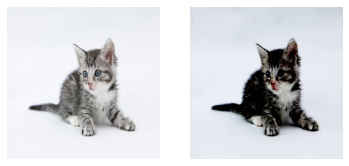

In [59]:
plot_imgs(img, img_pre)

In [60]:
import numpy as np
img_for_pred =np.expand_dims(img_pre,0)
pred = mobilenet.predict(img_for_pred)
print(img_for_pred.shape)
print(pred.shape)


(1, 224, 224, 3)
(1, 1000)


In [61]:
np.argmax(pred)


281

In [62]:
layer_outputs=[]
for layer in mobilenet.layers:
  layer_outputs.append(layer.output)

In [63]:
extract_layer_model = models.Model(inputs=mobilenet.input, outputs=layer_outputs)

In [64]:
extract_imgs=extract_layer_model(img_for_pred)
len(extract_imgs)

156

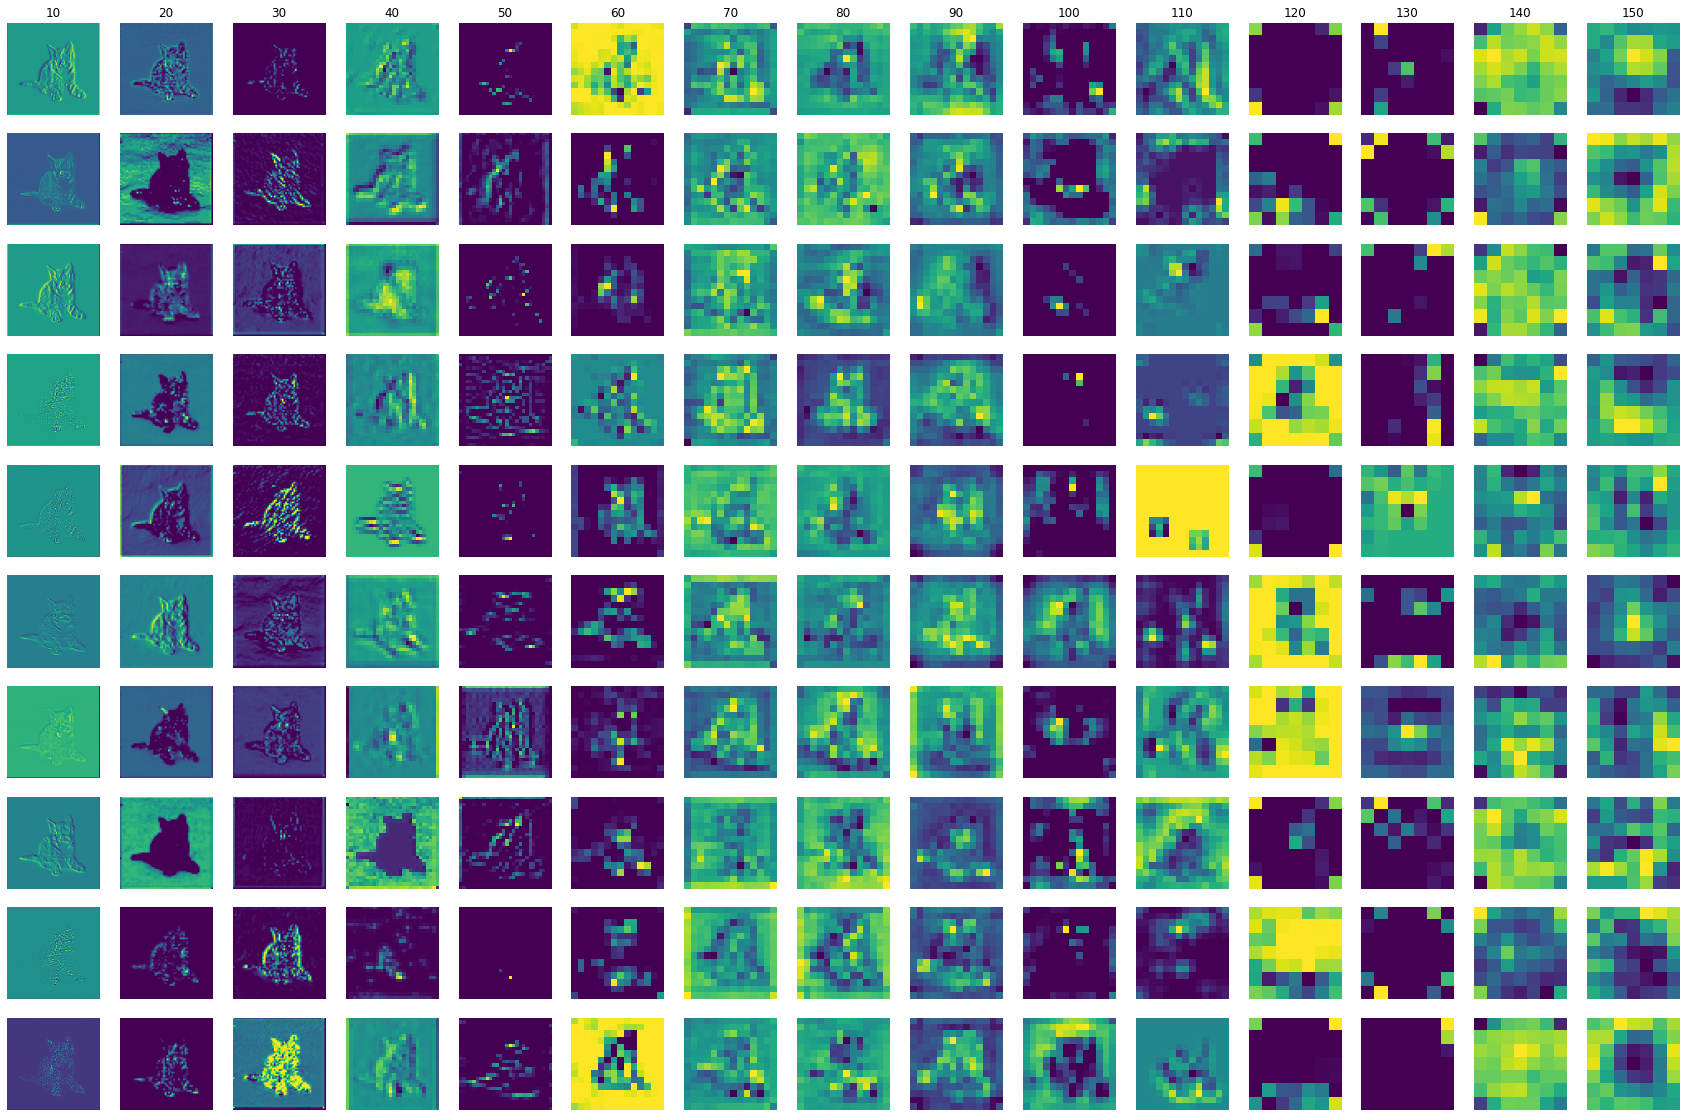

In [66]:
plot_by_layers(extract_imgs)